In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Engineer**

In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/adityapbx/PBL/refs/heads/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/adityapbx/PBL/refs/heads/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/adityapbx/PBL/refs/heads/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/adityapbx/PBL/refs/heads/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama tabel order_detail
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Menampilkan informasi mengenai missing value pada dataframe
print("Order Details")
df_od.info()
print("")
print("Payment Details")
df_pd.info()
print("")
print("Customer Details")
df_cd.info()
print("")
print("SKU Details")
df_sd.info()

Order Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 597.7+ KB

Payment Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   C

In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

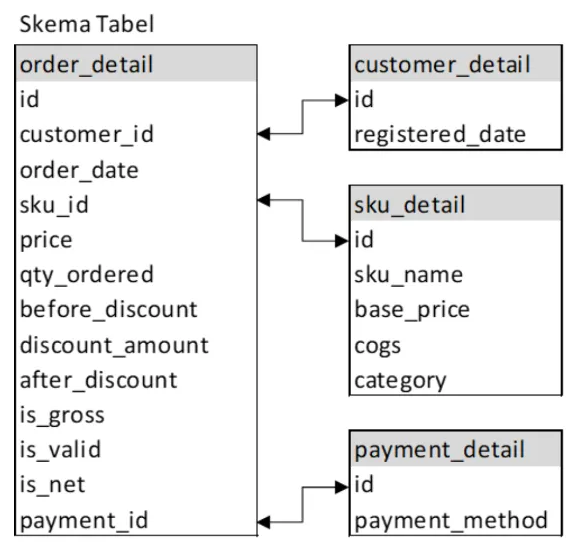

In [ ]:
#Mengampilkan 5 baris pertama tabel order_detail setalah dilakukan relational di mysql
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data before_discount,discount_amount,after_discount,dan base_price menjadi int agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
# Menghapus baris pada semua kolom yang mempunyai nilai discount_amount dibawah nol
df = df[df['discount_amount'] >= 0]

In [ ]:
# Cek duplikat dari setiap kolom
for col in df.columns:
    print(f"Duplikat pada kolom '{col}': {df.duplicated(subset=[col]).sum()}")

Duplikat pada kolom 'id': 120
Duplikat pada kolom 'customer_id': 1885
Duplikat pada kolom 'order_date': 5474
Duplikat pada kolom 'sku_id': 2677
Duplikat pada kolom 'price': 4234
Duplikat pada kolom 'qty_ordered': 5844
Duplikat pada kolom 'before_discount': 3963
Duplikat pada kolom 'discount_amount': 5714
Duplikat pada kolom 'after_discount': 3860
Duplikat pada kolom 'is_gross': 5882
Duplikat pada kolom 'is_valid': 5881
Duplikat pada kolom 'is_net': 5881
Duplikat pada kolom 'payment_id': 5867
Duplikat pada kolom 'payment_method': 5867
Duplikat pada kolom 'sku_name': 2677
Duplikat pada kolom 'base_price': 4380
Duplikat pada kolom 'cogs': 3412
Duplikat pada kolom 'category': 5868
Duplikat pada kolom 'registered_date': 5494


In [ ]:
# Drop duplicates based on the 'id' column
df = df.drop_duplicates(subset=['id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5763 entries, 0 to 5882
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5763 non-null   object        
 1   customer_id      5763 non-null   object        
 2   order_date       5763 non-null   datetime64[ns]
 3   sku_id           5763 non-null   object        
 4   price            5763 non-null   int64         
 5   qty_ordered      5763 non-null   int64         
 6   before_discount  5763 non-null   int64         
 7   discount_amount  5763 non-null   int64         
 8   after_discount   5763 non-null   int64         
 9   is_gross         5763 non-null   int64         
 10  is_valid         5763 non-null   int64         
 11  is_net           5763 non-null   int64         
 12  payment_id       5763 non-null   int64         
 13  payment_method   5763 non-null   object        
 14  sku_name         5763 non-null   object      

# **Data Analyst**

In [ ]:
df['discount_amount'].describe()

,discount_amount
count,5.763000e+03
mean,5.766924e+03
std,6.891017e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.610000e+06


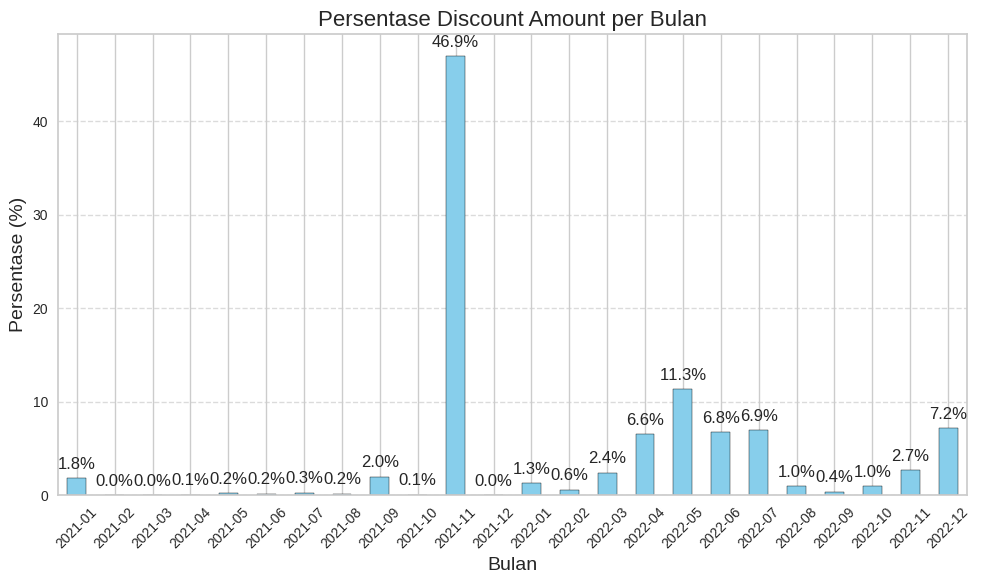

In [ ]:
# Tambahkan kolom bulan
df['month'] = df['order_date'].dt.to_period('M')  # Format periode bulanan

# Total diskon per bulan
monthly_discount = df.groupby('month')['discount_amount'].sum()

# Hitung persentase setiap bulan
total_discount = monthly_discount.sum()
monthly_discount_percentage = (monthly_discount / total_discount) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
monthly_discount_percentage.plot(kind='bar', color='skyblue', edgecolor='black')

# Tambahkan nilai persentase di atas masing-masing batang
for i, perc in enumerate(monthly_discount_percentage):
    plt.text(i, perc + 1, f'{perc:.1f}%', ha='center', fontsize=12)

# Menambahkan informasi ke grafik
plt.title('Persentase Discount Amount per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

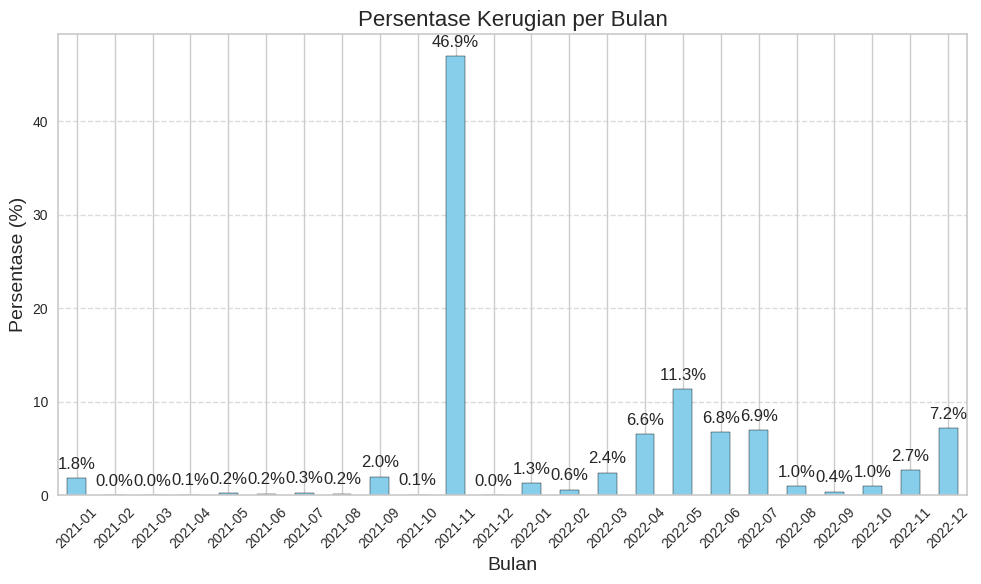

In [ ]:
# Buat kolom 'kerugian' untuk menghitung selisih
df['kerugian'] = df['before_discount'] - df['after_discount']

# Tambahkan kolom bulan
df['month'] = df['order_date'].dt.to_period('M')  # Format periode bulanan

# Total kerugian per bulan
monthly_loss = df.groupby('month')['kerugian'].sum()

# Hitung persentase setiap bulan
total_loss = monthly_loss.sum()
monthly_loss_percentage = (monthly_loss / total_loss) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
monthly_loss_percentage.plot(kind='bar', color='skyblue', edgecolor='black')

# Tambahkan nilai persentase di atas masing-masing batang
for i, perc in enumerate(monthly_loss_percentage):
    plt.text(i, perc + 1, f'{perc:.1f}%', ha='center', fontsize=12)

# Menambahkan informasi ke grafik
plt.title('Persentase Kerugian per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

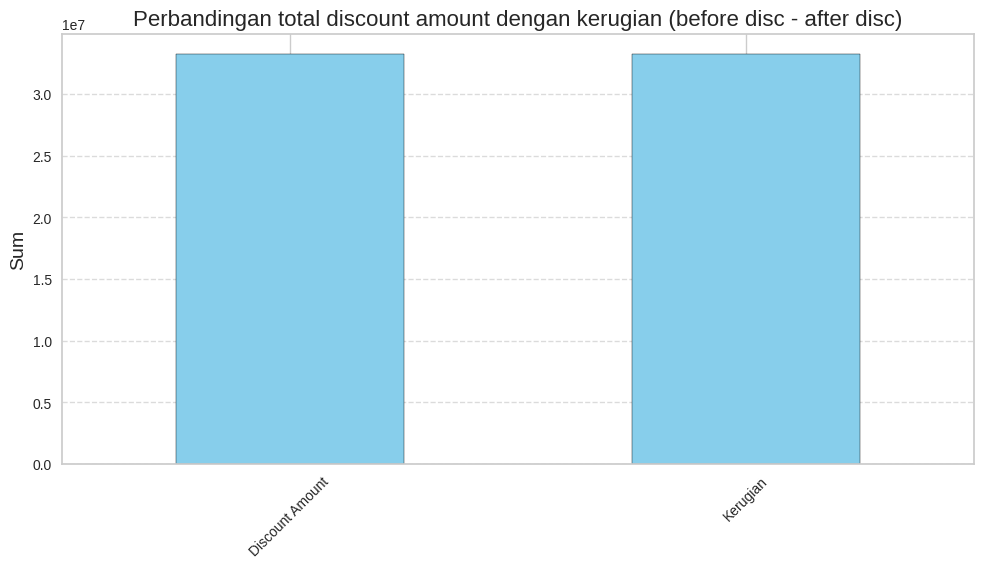

In [ ]:
df['kerugian'] = df['before_discount'] - df['after_discount']

total_discount = df['discount_amount'].sum()
total_loss = df['kerugian'].sum()

# Create a Pandas Series for plotting
discloss_data = pd.Series({'Discount Amount': total_discount, 'Kerugian': total_loss})

# Plot bar chart using the Series
plt.figure(figsize=(10, 6))
discloss_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan informasi ke grafik
plt.title('Perbandingan total discount amount dengan kerugian (before disc - after disc)', fontsize=16)
plt.ylabel('Sum', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari sini kami dapat menyimpulkan bahwa variable discount_amount adalah sebuah banyaknya kerugian

# **Data Scientist**

In [ ]:
#!pip install pycaret

## Forecasting

In [ ]:
from pycaret.time_series import *

In [ ]:
# Aggregate the data by month
df_aggregated = df.groupby(pd.Grouper(key='order_date', freq='M'))['discount_amount'].sum().reset_index()


# Set 'order_date' as the index
df_aggregated.set_index('order_date', inplace=True)
df_aggregated = df_aggregated.sort_index()

In [ ]:
# Inisialisasi forecasting
exp = setup(data=df_aggregated,
            target='discount_amount',
            session_id=123, # Untuk reproduksi
            fold=2,         # Cross-validation
            fh=6,          # Forecast horizon (contoh: 12 periode ke depan)
            seasonal_period=12, # Jika data musiman (bulanan: 12, mingguan: 7, dsb.)
            numeric_imputation_target='mean')

,Description,Value
0,session_id,123
1,Target,discount_amount
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(24, 1)"
5,Transformed data shape,"(24, 1)"
6,Transformed train set shape,"(18, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,9.5865,11.6000,1933290.7269,3814994.6182,1.9146,0.9582,-0.1304,0.1700
grand_means,Grand Means Forecaster,9.6166,11.5388,1925329.4444,3790845.5649,3.2838,1.0336,-0.1118,0.0800
naive,Naive Forecaster,9.6548,11.6530,2155126.0000,4190074.9815,1.5218,1.5217,-0.9227,3.2650
exp_smooth,Exponential Smoothing,9.6905,11.4975,2058380.4648,4066071.6663,5.1776,1.1912,-0.6979,0.0800
auto_arima,Auto ARIMA,9.7629,11.6982,2173492.6667,4204728.0958,1.0000,2.0000,-0.9333,0.3050
ets,ETS,9.7968,11.3960,2104718.9179,4064483.9331,8.1724,1.3150,-0.7533,0.1000
croston,Croston,9.9147,11.3529,1968362.0310,3734223.8393,8.4066,1.1317,-0.0836,0.0650
theta,Theta Forecaster,10.2333,11.8512,2560121.4993,4451306.3304,6.1119,1.4989,-1.5567,0.0850
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,11.0652,12.3325,4179455.2545,6937036.7120,12.7921,1.5821,-16.9331,0.2850
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,11.1029,12.2389,3939999.1402,6141022.1429,11.3909,1.6237,-10.2183,0.4250


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
print(best_model)

ARIMA()


In [ ]:
final_model = create_model(best_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-06,18.7907,23.0076,2712531.7385,6350089.6718,1.9143,1.0943,-0.2184
1,2021-12,0.3824,0.1925,1154049.7153,1279899.5647,1.9148,0.8220,-0.0425
Mean,NaT,9.5865,11.6000,1933290.7269,3814994.6182,1.9146,0.9582,-0.1304
SD,NaT,9.2042,11.4076,779241.0116,2535095.0536,0.0003,0.1361,0.0880


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Contoh: Forecast 12 periode ke depan
forecast = predict_model(final_model, fh=12)

# Menampilkan hasil prediksi
print(forecast)

               y_pred
2022-07  1.476819e+06
2022-08  1.541162e+06
2022-09  1.535821e+06
2022-10  1.536264e+06
2022-11  1.536227e+06
2022-12  1.536230e+06
2023-01  1.536230e+06
2023-02  1.536230e+06
2023-03  1.536230e+06
2023-04  1.536230e+06
2023-05  1.536230e+06
2023-06  1.536230e+06


In [ ]:
plot_model(final_model, plot='forecast')

Nilai prediksi terlihat stabil, mendekati rata-rata nilai historis dalam beberapa bulan terakhir.

In [ ]:
plot_model(final_model, plot='residuals')

Model tampak bekerja dengan baik pada sebagian besar waktu, dengan residuals yang relatif kecil.

## Regression

In [ ]:
from pycaret.regression import *

In [ ]:
# Create features that might be relevant for discount prediction
df['order_value'] = df['qty_ordered'] * df['base_price']
df['days_since_registration'] = (df['order_date'] - df['registered_date']).dt.days

# Select features for modeling
features = ['order_value','qty_ordered','before_discount','base_price','days_since_registration','category','payment_method','is_gross','is_valid','is_net']

# Prepare final dataset
modeling_df = df[features + ['discount_amount']]

In [ ]:
modeling_df.head()

,order_value,qty_ordered,before_discount,base_price,days_since_registration,category,payment_method,is_gross,is_valid,is_net,discount_amount
0,5220000,200,5220000,26100,135,Others,jazzwallet,1,1,0,2610000
1,9859710,5,9859710,1971942,-1,Entertainment,jazzwallet,1,0,0,2464927
2,7482000,1,7482000,7482000,6,Entertainment,Payaxis,1,0,0,2065344
3,3593680,1,3593680,3593680,19,Appliances,jazzwallet,1,1,1,1455440
4,4413220,1,4413220,4413220,139,Appliances,Payaxis,1,1,1,1059172


In [ ]:
# Inisialisasi PyCaret untuk regresi
reg_setup = setup(
        data=modeling_df,
        target='discount_amount',
        numeric_features=[
            'order_value',
            'qty_ordered',
            'before_discount',
            'base_price',
            'days_since_registration'
        ],
        categorical_features=[
            'category',
            'payment_method',
            'is_gross',
            'is_valid',
            'is_net'
        ],
        normalize=True,
        remove_multicollinearity=True,
        session_id=123
    )

,Description,Value
0,Session id,123
1,Target,discount_amount
2,Target type,Regression
3,Original data shape,"(5763, 11)"
4,Transformed data shape,"(5763, 37)"
5,Transformed train set shape,"(4034, 37)"
6,Transformed test set shape,"(1729, 37)"
7,Numeric features,5
8,Categorical features,5
9,Preprocess,True


In [ ]:
# Bandingkan semua model dan pilih yang terbaik
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,6078.5436,5998844495.5117,62704.3125,-0.0123,2.5138,0.9983,0.1800
huber,Huber Regressor,6073.4306,5999644512.9626,62708.2173,-0.0124,2.3321,1.0000,0.2900
dummy,Dummy Regressor,11561.9205,5965959217.4472,62706.7066,-0.0542,8.5041,1.3559,0.1690
knn,K Neighbors Regressor,8912.4801,5627338922.3714,63953.9530,-0.4840,4.1381,0.8691,0.3210
en,Elastic Net,12423.5695,5823461489.1807,64241.1391,-0.6247,7.8295,1.5394,0.2390
lightgbm,Light Gradient Boosting Machine,12396.4071,5563302975.9997,64998.5316,-1.1050,7.1737,1.2952,0.5620
br,Bayesian Ridge,14363.5568,5945225507.7951,66213.3969,-1.1276,8.1031,1.6936,0.1830
omp,Orthogonal Matching Pursuit,11377.4411,5946094254.2223,66403.1736,-1.1976,6.5837,1.8911,0.1720
ridge,Ridge Regression,14946.0154,5962182337.8649,66676.2724,-1.2703,8.1795,1.7918,0.1730
llar,Lasso Least Angle Regression,14945.2987,5962343332.5432,66677.9476,-1.2707,8.1789,1.7920,0.1740


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best_model)

PassiveAggressiveRegressor(random_state=123)


In [ ]:
# Complete model analysis
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

dari Feature Importance terdapat beberapa fitur yang sangat berpengaruh terhadap discount amount, yaitu:

1.   **payment_method_jazzwallet:** fitur ini memiliki pengaruh terbesar terhadap discount amount. Ini bisa berarti bahwa metode pembayaran dengan jazzwallet sering kali terkait dengan pemberian diskon yang lebih besar.
2.   **qty_ordered:** kuantitas barang yang dipesan juga memiliki pengaruh besar terhadap jumlah diskon. Ini logis karena banyak bisnis memberikan diskon lebih besar untuk pembelian dalam jumlah besar (bulk purchase).
3. **payment_method_jazzvoucher:** Metode pembayaran ini juga penting, yang menunjukkan bahwa diskon tertentu mungkin berlaku untuk pembeli yang menggunakan jazzvoucher.

